Read the data file

In [1]:
import pandas as pd

In [3]:
data=pd.read_csv("MLCC.csv")


Looking at the data

In [4]:
data.head()

ClaimNumber   EvalResult  6054  6055  6056  ...  8446  8447  8448  8449  8450
0            1            0     0     0     0  ...     0     0     0     0     0
1            2            0     0     0     0  ...     1     1     1     1     0
2            3            0     0     0     0  ...     2     2     2     1     0
3            4            0     0     0     0  ...     3     2     3     1     0
4            5            0     0     0     0  ...     4     2     4     1     0

[5 rows x 59 columns]

In [5]:
features = data.columns[2:]
features

Index(['6054', '6055', '6056', '6057', '6058', '6060', '6061', '6062', '6063',
       '6064', '6065', '6066', '6067', '6068', '6069', '6070', '6071', '6072',
       '6073', '6074', '6075', '6076', '6077', '6078', '6079', '6080', '6081',
       '6082', '6083', '6084', '6085', '6087', '6088', '6089', '7778', '7779',
       '7781', '7782', '7783', '7786', '7788', '7789', '7791', '7792', '7925',
       '7926', '7927', '7928', '7929', '7930', '7931', '8445', '8446', '8447',
       '8448', '8449', '8450'],
      dtype='object')

Removing noise/outliers from the data

In [6]:
outliers = data[ (data[' EvalResult'] !=0) & (data[' EvalResult'] !=1)].index 


In [7]:
data.drop(outliers, inplace = True)

In [8]:
data.describe()

ClaimNumber     EvalResult  ...           8449           8450
count  283064.000000  283064.000000  ...  283064.000000  283064.000000
mean   141533.374541       0.158063  ...       0.979821       0.034688
std     81713.872676       0.364801  ...       0.239840       0.823398
min         1.000000       0.000000  ...       0.000000       0.000000
25%     70767.750000       0.000000  ...       1.000000       0.000000
50%    141533.500000       0.000000  ...       1.000000       0.000000
75%    212299.250000       0.000000  ...       1.000000       0.000000
max    283065.000000       1.000000  ...       3.000000      40.000000

[8 rows x 59 columns]

In [11]:
len(data[ (data[' EvalResult']==0)].index )

238322

In [12]:
len(data[ (data[' EvalResult']==1)].index )

44742

Visualizing the effect of various IDs on the value of Eval Result

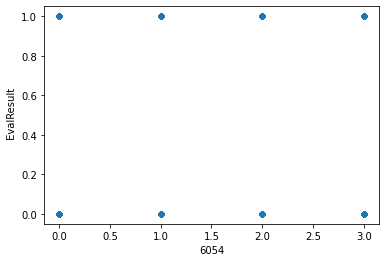

In [14]:
data.plot(x ='6054', y=' EvalResult', kind = 'scatter')


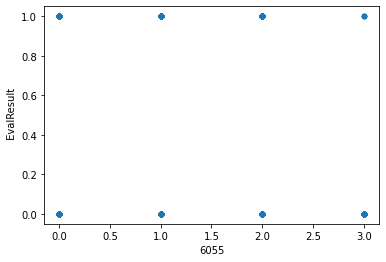

In [15]:
data.plot(x ='6055', y=' EvalResult', kind = 'scatter')


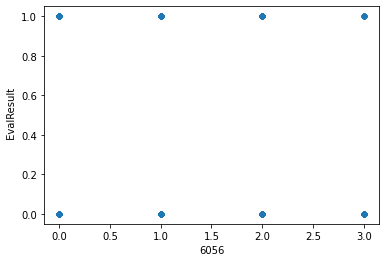

In [16]:
data.plot(x ='6056', y=' EvalResult', kind = 'scatter')

Looking at the correlation between the various variables. This helps in removing features which do not define the trend in the value to be predicted

In [17]:
corr = data.iloc[:,1:-1].corr()

In [18]:
import seaborn as sns

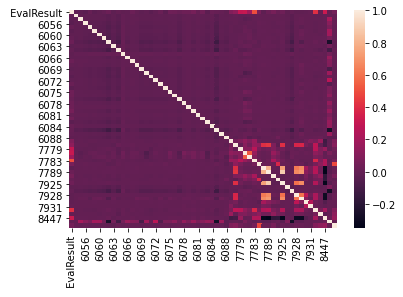

In [19]:
sns.heatmap(corr)

Preparing the dataset

In [20]:
X=data.dropna()

In [23]:
X=X.drop('ClaimNumber',axis=1)

In [24]:
y=X[' EvalResult']

In [25]:
X = X.drop(' EvalResult',axis=1)

In [26]:
X.head()

6054  6055  6056  6057  6058  6060  ...  8445  8446  8447  8448  8449  8450
0     0     0     0     0     0     0  ...     0     0     0     0     0     0
1     0     0     0     0     0     0  ...     0     1     1     1     1     0
2     0     0     0     0     0     0  ...     1     2     2     2     1     0
3     0     0     0     0     0     0  ...     1     3     2     3     1     0
4     0     0     0     0     0     0  ...     1     4     2     4     1     0

[5 rows x 57 columns]

Performing splits to test the accuracy of the model

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

## Exploring various classifiers

## Accuracy Metrics:
1) Recall
2)Precision
3) f1 Score

Since the dataset is imbalanced, accuarcy isn't a good metric because although I have applied stratified split, the number of samples corresponding to EvalResult=1 are very less as compared to EvalResult=0.
Classification Report provides us with classwise value of the above three parameters to judge if the model is working efficiently or not.
The above three parameters help us decide and focus on the true positives and the true negatives which highlight whether the model is able to classify the two labels correctly or not.




1) Decision Trees with accuracy score and area under the curve from sklearn as accuracy metrics

In [28]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.metrics import roc_auc_score, classification_report


Model Building

In [35]:

model_dtree = DecisionTreeClassifier(max_depth = 2, random_state = 1)
model_dtree.fit(X_train,y_train)
prediction=model_dtree.predict(X_test)
print('The accuracy metrics of the Decision Tree is')
print(classification_report(prediction,y_test))

The accuracy metrics of the Decision Tree is
              precision    recall  f1-score   support

           0       1.00      0.88      0.94     88596
           1       0.31      0.94      0.46      4816

    accuracy                           0.89     93412
   macro avg       0.65      0.91      0.70     93412
weighted avg       0.96      0.89      0.91     93412



Looking at the features importance for pruning/dimensionality reduction

In [31]:
for index,i in enumerate(model_dtree.feature_importances_):
    if i>0:
    print(features[index],i)


7783 0.7095990213105224
8446 0.024977593351230377
8447 0.2654233853382472


In [32]:
new_X=X[['7783', '8446','8447']]

In [34]:
from sklearn.model_selection import train_test_split

new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, y, test_size=0.33, random_state=42,stratify=y)

In [36]:
model_dtree = DecisionTreeClassifier(max_depth =2, random_state = 1)
model_dtree.fit(new_X_train,new_y_train)
prediction=model_dtree.predict(new_X_test)
print('The accuracy metrics of the Decision Tree is')
print(classification_report(prediction,y_test))

The accuracy metrics of the Decision Tree is
              precision    recall  f1-score   support

           0       1.00      0.88      0.94     88596
           1       0.31      0.94      0.46      4816

    accuracy                           0.89     93412
   macro avg       0.65      0.91      0.70     93412
weighted avg       0.96      0.89      0.91     93412



Not much difference is observed after feature pruning

2) XGB boost Classifier

In [37]:
from xgboost import XGBClassifier


xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=42, eval_metric="auc")

xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [38]:
prediction=xgb.predict(X_test)
print('The accuracy metrics of the XGB Classifier is')
print(classification_report(prediction,y_test))

The accuracy metrics of the XGB Classifier is
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     79920
           1       0.83      0.91      0.87     13492

    accuracy                           0.96     93412
   macro avg       0.91      0.94      0.92     93412
weighted avg       0.96      0.96      0.96     93412



##Experiments to confirm that dimensionality reduction does not give better results

Looking at the features importance for pruning/dimensionality reduction

###Chi Test

In [39]:
from sklearn.feature_selection import  chi2
chi_scores = chi2(X,y)

In [40]:
chi_scores

(array([3.40902209e+01, 1.69228754e+02, 3.53883815e+02, 5.75955066e+01,
        3.90551260e+02, 1.61151832e+02, 5.49080123e+00, 4.77275869e+02,
        2.04414702e+02, 2.50394411e+00, 1.70921634e+00, 1.63838565e+01,
        2.55106562e+02, 1.12417860e-01, 1.05276115e+02, 1.92221931e+01,
        5.13520077e+02, 3.62998643e+01, 1.78416573e+02, 2.50630403e+02,
        6.96170313e+02, 4.69058034e+02, 1.34646877e+02, 3.33682991e+02,
        3.77375811e+02, 1.87890828e+03, 2.67511099e+01, 1.05802362e+03,
        2.71463183e+02, 1.46963237e+02, 4.28119365e+01, 1.39009505e+01,
        1.60171074e+02, 3.68435576e+03, 4.33918262e+03, 3.92303570e+04,
        2.79969998e+04, 1.17695077e+04, 1.21691965e+05, 4.62521555e+01,
        1.58478043e+02, 2.63967680e+02, 1.52658668e+03, 6.79906077e+01,
        7.22472851e+02, 5.06020183e+01, 1.35361494e+01, 2.79170010e+02,
        8.70282486e+02, 3.79234818e+01, 2.95019432e+01, 7.64506078e+04,
        7.64720866e-01, 9.81042432e+03, 1.42847691e+00, 4.104626

In [41]:

p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

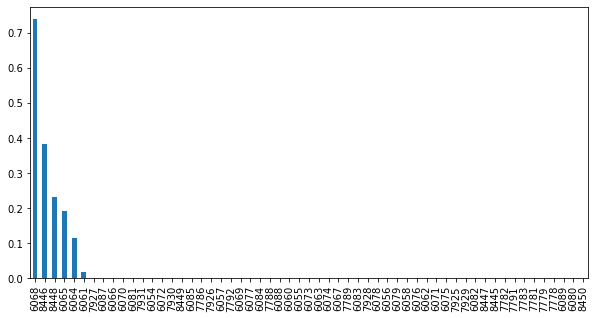

In [42]:
p_values.plot.bar(figsize=(10,5))


In [43]:
p_values.keys()[:25]


Index(['6068', '8446', '8448', '6065', '6064', '6061', '7927', '6087', '6066',
       '6070', '6081', '7931', '6054', '6072', '7930', '8449', '6085', '7786',
       '7926', '6057', '7792', '6069', '6077', '6084', '7788'],
      dtype='object')

In [44]:
reduced_data=X[['6065', '6054', '7926', '7792', '8446', '6064', '7931', '6057', '6073',
       '8449', '6078', '7786', '6070']]

In [45]:
from sklearn.model_selection import train_test_split

new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(reduced_data, y, test_size=0.33, random_state=42,stratify = y)

In [49]:
from xgboost import XGBClassifier


xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=42, eval_metric="auc")

xgb.fit(new_X_train,new_y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [50]:
prediction=xgb.predict(new_X_test)
print('The accuracy metrics of the XGB Classifier is')
print(classification_report(prediction,new_y_test))

The accuracy metrics of the XGB Classifier is
              precision    recall  f1-score   support

           0       1.00      0.85      0.92     92985
           1       0.03      0.89      0.05       427

    accuracy                           0.85     93412
   macro avg       0.51      0.87      0.48     93412
weighted avg       0.99      0.85      0.91     93412



###Random Forest feature Importance

In [51]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1, max_depth=10)

model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

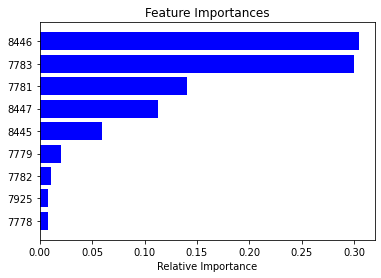

In [54]:
import numpy as np
import matplotlib.pyplot as plt

importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

###PCA

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X)

In [60]:
from sklearn.decomposition import PCA


In [61]:
pca=PCA(n_components=30)
X_new=pca.fit_transform(X)

In [63]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=42,stratify=y)

In [64]:

xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=42, eval_metric="auc")

xgb.fit(X_train_new,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [65]:
prediction=xgb.predict(X_test_new)
print('The accuracy metrics of the XGB Classifier is')
print(classification_report(prediction,y_test))

The accuracy metrics of the XGB Classifier is
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     74117
           1       0.68      0.84      0.75     10803

    accuracy                           0.93     84920
   macro avg       0.83      0.89      0.85     84920
weighted avg       0.94      0.93      0.93     84920

